In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Get responder mapping

In [21]:
response=pd.read_csv("../data/M4_sample_mapping.csv")

In [22]:
mp_response=dict(zip(response["sample.id"],response["class"]))

## Get RNA data

In [31]:
rna=pd.read_csv("../data/M4_rna.csv",skiprows=[0])

In [32]:
rna=rna.set_index("SYMBOL")

In [33]:
for x in rna.columns:
    rna[x]=rna[x]/rna[x].sum()

In [35]:
rna=rna*1000000

In [36]:
rna=rna.T

In [38]:
rna+=1
rna=np.log2(rna)

In [39]:
rna["group"]=rna.index.map(mp_response)

## boxplots for gene expression

In [40]:
mouse=pd.read_csv("../data/mart_export.txt",delimiter="\t")

In [41]:
mouse=mouse[~mouse["Gene name"].duplicated()]

In [42]:
mouse.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Gene name,Mouse gene stable ID,Mouse gene name,Mouse chromosome/scaffold start (bp),Mouse chromosome/scaffold end (bp),Mouse chromosome/scaffold name
0,ENSG00000152240,ENSG00000152240.13,ENST00000282058,ENST00000282058.11,HAUS1,ENSMUSG00000041840,Haus1,77757567,77773886,18
12,ENSG00000166710,ENSG00000166710.21,ENST00000559720,ENST00000559720.5,B2M,ENSMUSG00000060802,B2m,122147686,122153083,2
26,ENSG00000075303,ENSG00000075303.13,ENST00000341119,ENST00000341119.10,SLC25A40,ENSMUSG00000054099,Slc25a40,8422850,8454797,5
34,ENSG00000213689,ENSG00000213689.14,ENST00000433541,ENST00000433541.1,TREX1,ENSMUSG00000049734,Trex1,109057933,109059734,9
40,ENSG00000090382,ENSG00000090382.7,ENST00000261267,ENST00000261267.7,LYZ,ENSMUSG00000020177,9530003J23Rik,117232237,117238703,10


Haus1
B2m
Slc25a40
Trex1
9530003J23Rik
Gm15448
Lair1
Psmd2


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

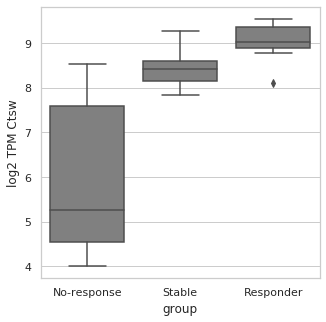

<Figure size 360x360 with 0 Axes>

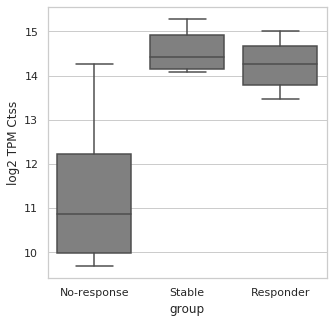

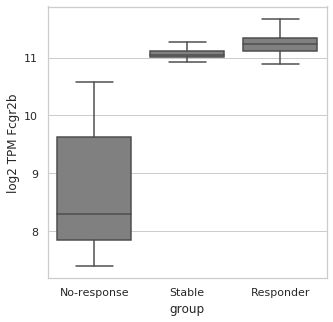

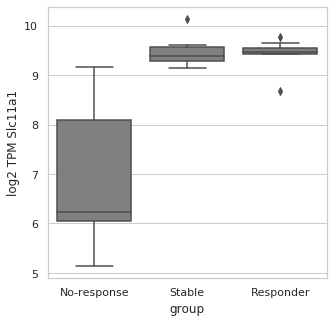

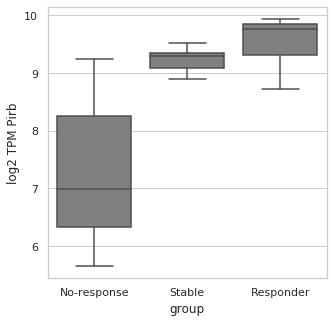

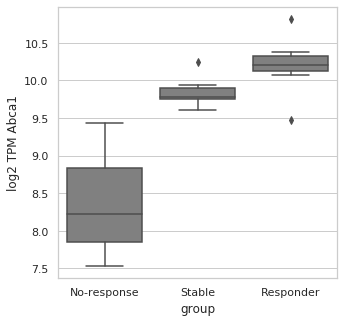

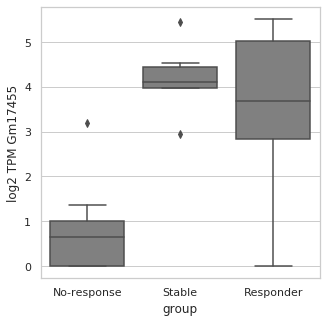

In [48]:
for x in mouse["Mouse gene name"].tolist()+["Pirb"]:
    try:
        sns.set(style="whitegrid", font_scale = 1)
        plt.figure(figsize=(5,5))
        ax=sns.boxplot(x="group", y=x,data=rna,color="gray")
        plt.ylabel("log2 TPM "+x)
    except:
        print(x)
    

In [49]:
# for x in rna.columns.tolist()[0:100]:
#     try:
#         sns.set(style="whitegrid", font_scale = 1)
#         plt.figure(figsize=(5,5))
#         ax=sns.boxplot(x="group", y=x,data=rna,color="gray")
#         plt.ylabel("log2 TPM "+x)
#     except:
#         print(x)
    